In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
data = pd.read_csv("Achilles_gene_effectN.csv", index_col = 0)
#print(data.index)
gene_list = pd.read_csv("go_metabolism_purine.csv", index_col =0)
#print(gene_list.index.tolist())
subset = data[data.columns[data.columns.isin(gene_list.index.tolist())]]

#print(subset)
corr = subset.corr(method = 'pearson')

In [3]:
#corr.to_csv('gm.correlation_matrix_purine20231128.csv')
#print(corr)
#print(pd.read_csv('gm.correlation_matrix_purine20231128.csv', index_col=0))

In [4]:
data = corr #pd.read_csv('gm.correlation_matrix_purine20231128.csv', index_col=0)
#data = pd.read_csv('20220915_gm.correlation_matrix_py.csv', index_col=0)

links = data.stack().reset_index()
links.columns = ['var1', 'var2', 'value']
cutoff = 0.25
    # Filter the data based on cutoff and remove self-correlation
links_filtered = links.loc[(links['value'] > cutoff) & (links['var1'] != links['var2'])]

    # Graph the diagram
G = nx.from_pandas_edgelist(links_filtered, 'var1', 'var2', ['var1', 'var2', 'value'])
pos = graphviz_layout(G, prog='neato')

    # Make a list to specify edge color
edge_weight = []
for edge in G.edges:
        weight = float(G.edges[edge]['value']) / max(links_filtered['value']) * 4
        edge_weight.append(weight)

    # Import the categories for color scheme
    # Reorder gene list to assign color to each node
gene_list = pd.read_csv("go_metabolism_purine.csv")
categ = gene_list.set_index('Gene')
categ = categ.reindex(G.nodes())

    # Transform categorical column in a numerical value
categ['Category'] = pd.Categorical(categ['Category'])
color_map = categ['Category'].cat.codes

#print(color_map)
#print(color_map.index)
#print(color_map.to_frame().T)
#print(type(color_map))
    # Specify colors/fonts/title for graph
    
#color_map.to_csv('gm.color_map_purine_20231128.csv')

In [5]:
#type(color_map)
mapping = {0:"mediumseagreen", 1: "deepskyblue", 2: "gold", 3: "#DA70D6", 4: "orangered"}
color_map_replaced = color_map
color_map_replaced.replace(mapping, inplace=True)
#print(color_map)

#print(color_map.describe())
##Inplace, replace the old data with new ones
#color_map.replace({'0': mapping}, inplace=True)

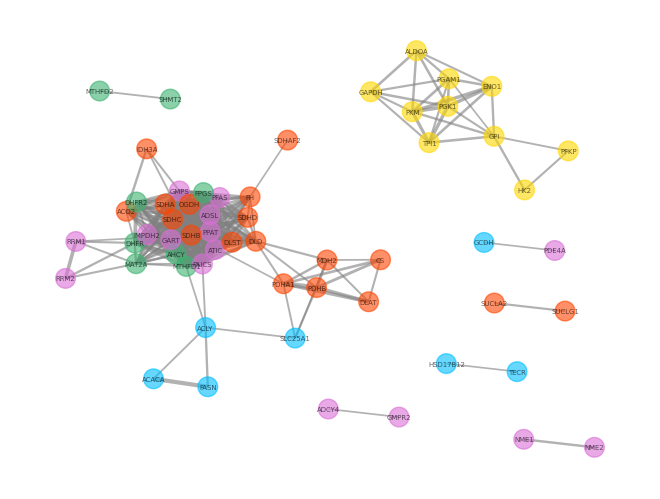

In [6]:
nx.draw(G,
        pos=pos,
        with_labels=True, 
        node_color= color_map_replaced,
        #pd.read_csv('gm.color_map_purine_20231128.csv',index_col=0).squeeze(), 
        cmap=plt.cm.tab20, node_size=200, alpha=0.6,
        edge_color='gray', width=edge_weight, linewidths=1, font_size=5)

plt.savefig("suppementary_fig_4J_purine_replaced_color.pdf")